In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
Ndis_df=pd.read_csv('USdisaster.csv')
Ndis_df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025780
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025783
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025777
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19Z,60c3b7a9a0ee349d7102577a
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025774


In [3]:
Ndis_df.shape

(62771, 22)

In [4]:
Ndis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62771 entries, 0 to 62770
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     62771 non-null  object
 1   disaster_number             62771 non-null  int64 
 2   state                       62771 non-null  object
 3   declaration_type            62771 non-null  object
 4   declaration_date            62771 non-null  object
 5   fy_declared                 62771 non-null  int64 
 6   incident_type               62771 non-null  object
 7   declaration_title           62771 non-null  object
 8   ih_program_declared         62771 non-null  int64 
 9   ia_program_declared         62771 non-null  int64 
 10  pa_program_declared         62771 non-null  int64 
 11  hm_program_declared         62771 non-null  int64 
 12  incident_begin_date         62771 non-null  object
 13  incident_end_date           54433 non-null  ob

In [5]:
Ndis_df.describe()

,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
count,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000
mean,2540.282503,2003.958452,0.168470,0.273805,0.930828,0.426566,31711.800577,96348.959854,35295.169824
std,1394.657070,14.703548,0.374286,0.445914,0.253749,0.494582,16539.960239,14036.315551,35272.190599
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.000000
25%,1293.000000,1996.000000,0.000000,0.000000,1.000000,0.000000,20000.000000,99029.000000,8135.000000
50%,3033.000000,2006.000000,0.000000,0.000000,1.000000,0.000000,30037.000000,99073.000000,19106.000000
75%,3482.000000,2017.000000,0.000000,1.000000,1.000000,1.000000,46079.000000,99125.000000,74060.000000
max,5423.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,78030.000000,99507.000000,99159.000000


In [6]:
Ndis_df.isnull().sum()

fema_declaration_string           0
disaster_number                   0
state                             0
declaration_type                  0
declaration_date                  0
fy_declared                       0
incident_type                     0
declaration_title                 0
ih_program_declared               0
ia_program_declared               0
pa_program_declared               0
hm_program_declared               0
incident_begin_date               0
incident_end_date              8338
disaster_closeout_date        15319
fips                              0
place_code                        0
designated_area                   0
declaration_request_number        0
hash                              0
last_refresh                      0
id                                0
dtype: int64

In [7]:
for i in Ndis_df.select_dtypes(exclude=['float64']).columns:
    print(i,Ndis_df[i].nunique())

fema_declaration_string 4632
disaster_number 4632
state 59
declaration_type 3
declaration_date 3978
fy_declared 70
incident_type 23
declaration_title 2189
ih_program_declared 2
ia_program_declared 2
pa_program_declared 2
hm_program_declared 2
incident_begin_date 3458
incident_end_date 3272
disaster_closeout_date 1812
fips 3323
place_code 1302
designated_area 2952
declaration_request_number 4632
hash 62771
last_refresh 284
id 62771


## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

Text(0.5, 0, 'disaster_number')

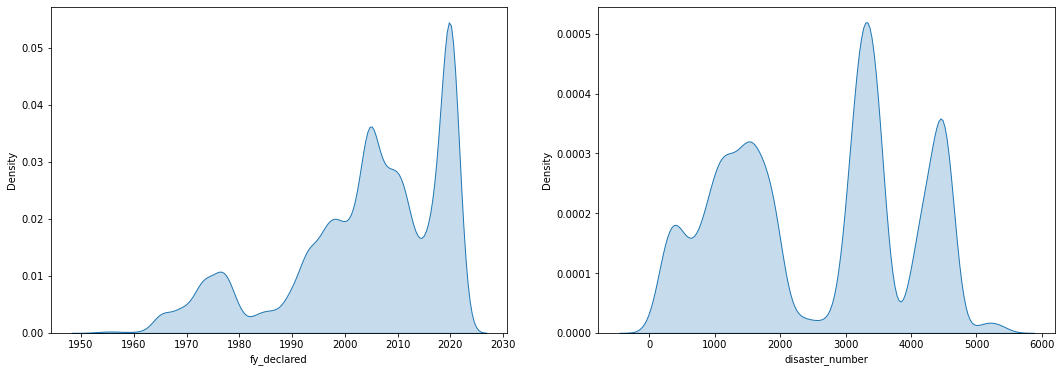

In [8]:
plt.figure(figsize=(18,6)) 
plt.subplot(121)
sns.kdeplot(data=Ndis_df, x="fy_declared",fill=True)
plt.xlabel("fy_declared")

plt.subplot(122)
sns.kdeplot(data=Ndis_df, x="disaster_number",fill=True)
plt.xlabel("disaster_number")


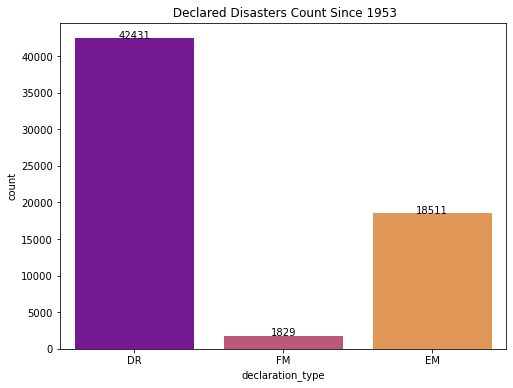

In [9]:
plt.figure(figsize=(8,6)) 
ax=sns.countplot(x = 'declaration_type',data = Ndis_df,palette='plasma')
plt.title(" Declared Disasters Count Since 1953")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, height ,ha="center")
plt.show()

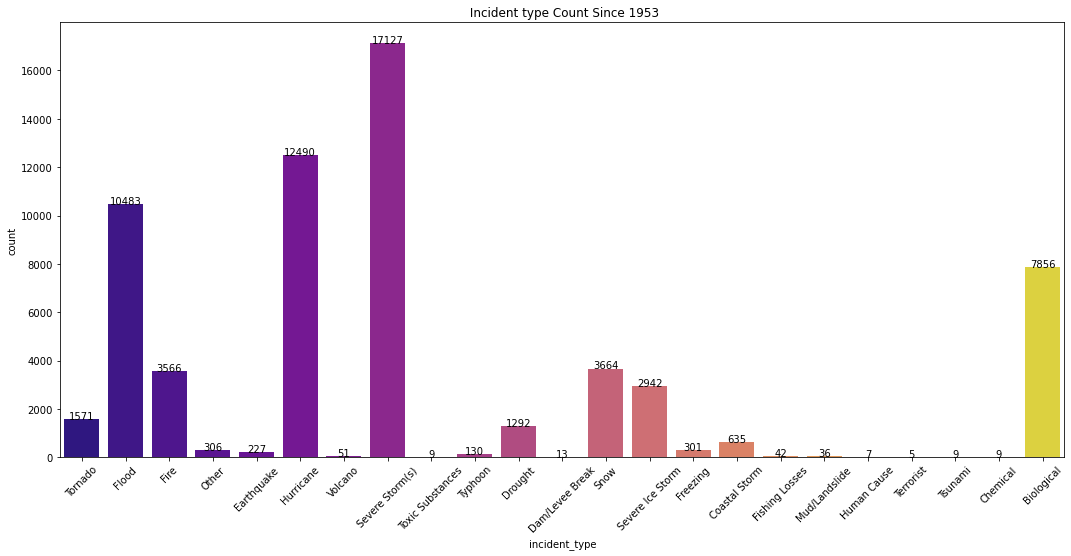

In [10]:
plt.figure(figsize=(18,8)) 
plt.xticks(rotation=45)
ax=sns.countplot(x = 'incident_type',data = Ndis_df,palette='plasma')
plt.title(" Incident type Count Since 1953")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height + 0.1,height ,ha="center")
plt.show()

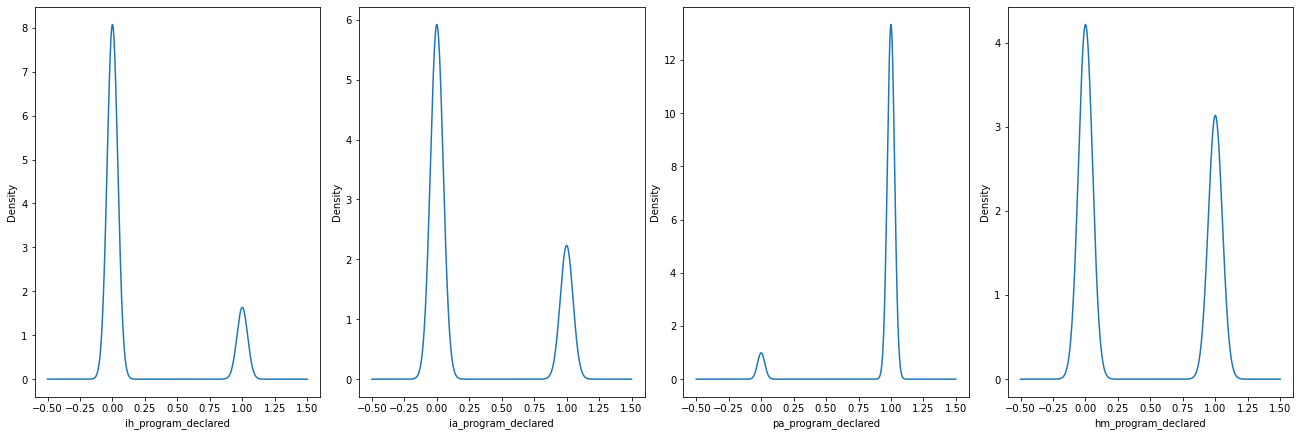

In [11]:
plt.subplot(141)
Ndis_df['ih_program_declared'].plot.kde(figsize=(18,6))
plt.xlabel("ih_program_declared")
plt.tight_layout(pad=0.5)

plt.subplot(142)
Ndis_df['ia_program_declared'].plot.kde()
plt.xlabel("ia_program_declared")
plt.tight_layout(pad=0.5)

plt.subplot(143)
Ndis_df['pa_program_declared'].plot.kde()
plt.xlabel("pa_program_declared")
plt.tight_layout(pad=0.5)

plt.subplot(144)
Ndis_df['hm_program_declared'].plot.kde()
plt.xlabel("hm_program_declared")
plt.tight_layout(pad=0.5)

### Bivariate Analysis

<AxesSubplot:xlabel='incident_type', ylabel='fy_declared'>

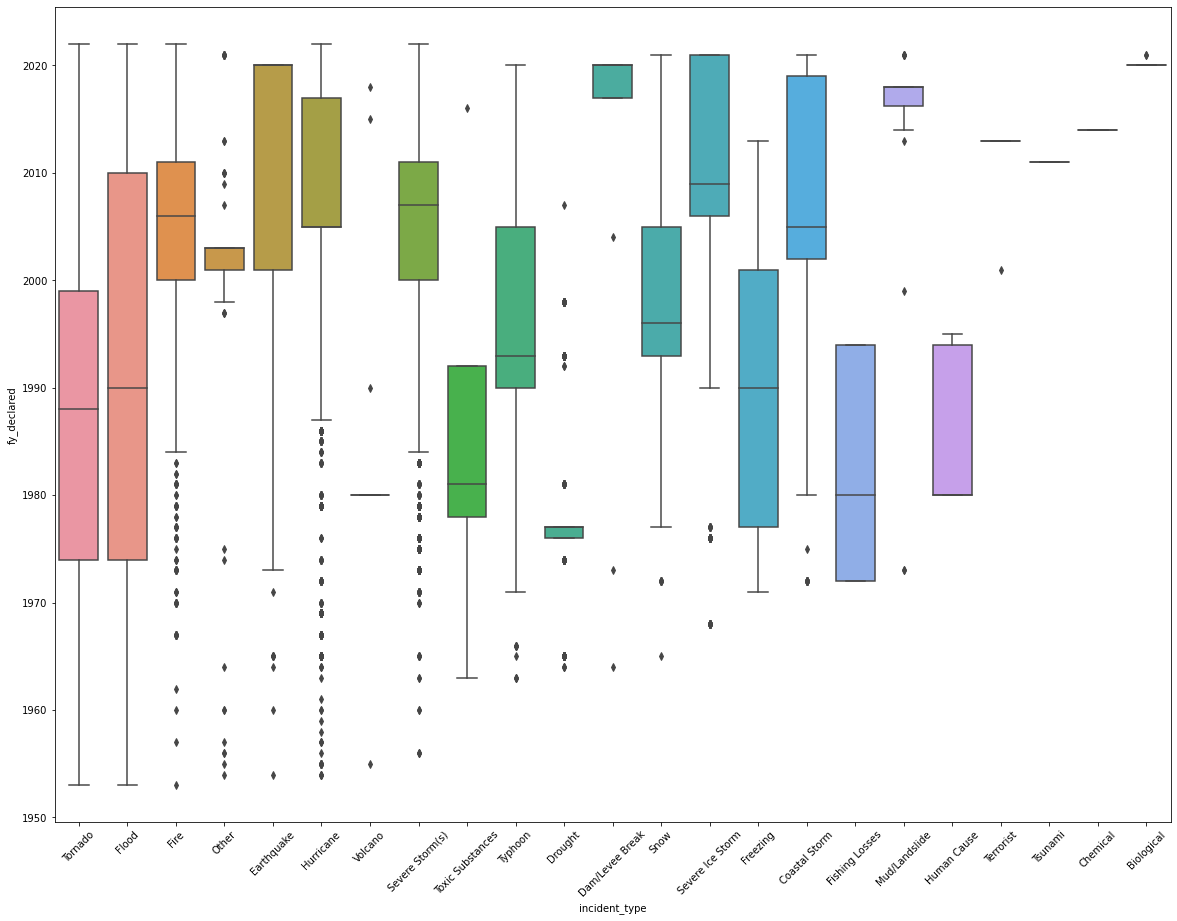

In [12]:
# Perform Bivariate Analysis using boxplot
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(x= "incident_type",y = "fy_declared", data=Ndis_df)

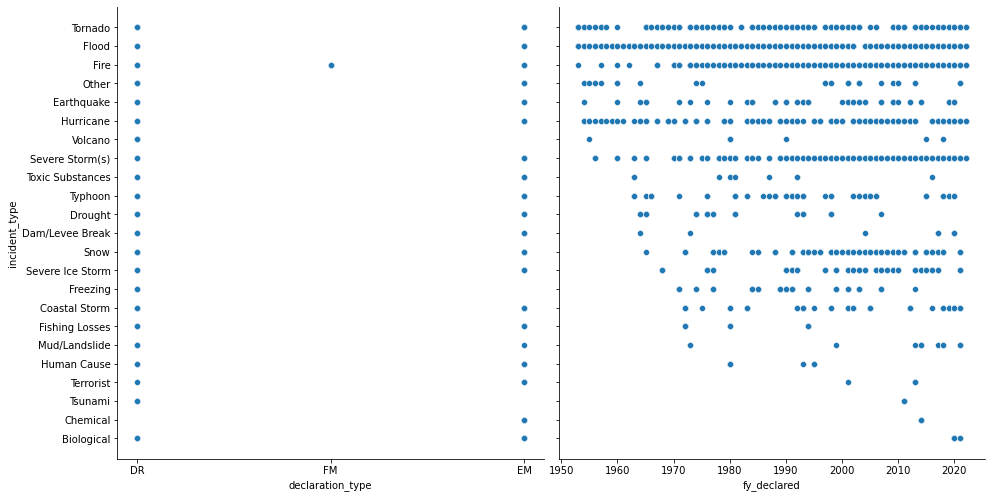

In [13]:
sns.pairplot(
    Ndis_df,
    x_vars=[ 'declaration_type','fy_declared'],
    y_vars=['incident_type'],height=7  
)

<AxesSubplot:xlabel='hm_program_declared', ylabel='disaster_number'>

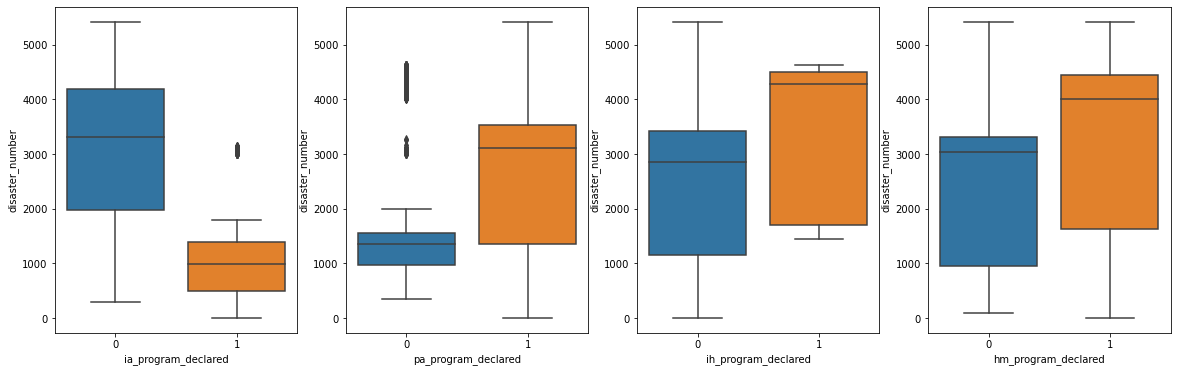

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,6)) # create 1x4 array of subplots
sns.boxplot(y = "disaster_number", x = "ia_program_declared", data=Ndis_df, ax=axes[0]) # add boxplot to 1st subplot
sns.boxplot(y = "disaster_number", x = "pa_program_declared", data=Ndis_df, ax=axes[1])
sns.boxplot(y = "disaster_number", x = "ih_program_declared", data=Ndis_df, ax=axes[2]) 
sns.boxplot(y = "disaster_number", x = "hm_program_declared", data=Ndis_df, ax=axes[3])

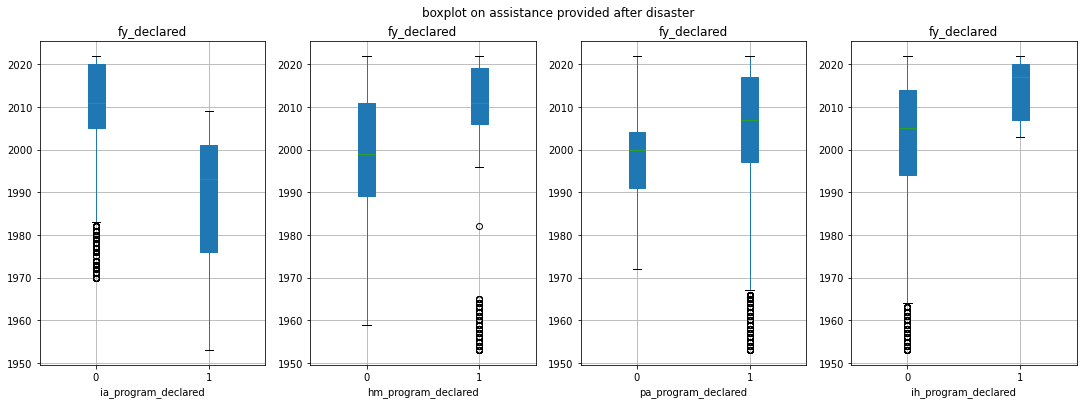

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(18,6)) # create 1x4 array of subplots
Ndis_df.boxplot(column='fy_declared',by='ia_program_declared', ax=axes[0],patch_artist=True) # add boxplot to 1st subplot
Ndis_df.boxplot(column='fy_declared', by='hm_program_declared', ax=axes[1],patch_artist=True) # add boxplot to 2nd subplot
Ndis_df.boxplot(column='fy_declared', by='pa_program_declared', ax=axes[2],patch_artist=True)
Ndis_df.boxplot(column='fy_declared', by='ih_program_declared', ax=axes[3],patch_artist=True)
fig.suptitle('boxplot on assistance provided after disaster')
plt.show()

## DATA PREPROCESSING

In [16]:
Ndis_df.isnull().sum()

fema_declaration_string           0
disaster_number                   0
state                             0
declaration_type                  0
declaration_date                  0
fy_declared                       0
incident_type                     0
declaration_title                 0
ih_program_declared               0
ia_program_declared               0
pa_program_declared               0
hm_program_declared               0
incident_begin_date               0
incident_end_date              8338
disaster_closeout_date        15319
fips                              0
place_code                        0
designated_area                   0
declaration_request_number        0
hash                              0
last_refresh                      0
id                                0
dtype: int64

As the column 'disaster_closeout_date' has 1/4 th of the values as missing, we drop the column 

In [17]:
Ndis_df.drop('disaster_closeout_date',axis=1 , inplace=True)
Ndis_df.shape

(62771, 21)

In [18]:
#incident recorded count
duration = Ndis_df.groupby('incident_type')['incident_begin_date','incident_end_date'].count()
duration

,incident_begin_date,incident_end_date
incident_type,,
Biological,7856,0
Chemical,9,9
Coastal Storm,635,634
Dam/Levee Break,13,13
Drought,1292,1292
Earthquake,227,227
Fire,3566,3102
Fishing Losses,42,42
Flood,10483,10483


In [19]:
types=duration.index.to_list()
dur=duration.to_numpy()
inci_type={}
j=0
for i in dur:
    if(i[0]-i[1]>0):
        key=types[j]
        inci_type[key]=i[0]-i[1]
    j=j+1
inci_type

{'Biological': 7856,
 'Coastal Storm': 1,
 'Fire': 464,
 'Hurricane': 16,
 'Severe Storm(s)': 1}

##### these are the incident types which has null values in incident_end_date.

as per the graph we had in univariate analysis, Biological incidents happened in these years are of count 7856 and the missing 
value count is also the same. i.e for all the data in biological incidents, Biological incident_end_date is left null.

In [20]:
biological_rows  = Ndis_df.loc[(Ndis_df['incident_type']=='Biological') ]
display(biological_rows[['incident_type','incident_begin_date','incident_end_date']])

,incident_type,incident_begin_date,incident_end_date
51210,Biological,2020-01-20T14:00:00Z,NaN
51211,Biological,2020-01-20T14:00:00Z,NaN
51212,Biological,2020-01-20T14:00:00Z,NaN
51213,Biological,2020-01-20T14:00:00Z,NaN
51214,Biological,2020-01-20T14:00:00Z,NaN
...,...,...,...
59202,Biological,2020-01-20T14:00:00Z,NaN
59203,Biological,2020-01-20T14:00:00Z,NaN
59204,Biological,2020-01-20T14:00:00Z,NaN
60834,Biological,2020-01-20T12:00:00Z,NaN


As all the entries in the category does not have incident_end_date , we drop those rows which is of incident_type 'Biological'

In [21]:
Ndis_df.drop(Ndis_df[Ndis_df['incident_type'] == 'Biological'].index, inplace = True)


handling missing values of Coastal Storm Incident type

In [22]:
coastal_rows  = Ndis_df.loc[(Ndis_df['incident_type']=='Coastal Storm') ]
display(coastal_rows[['incident_type','incident_begin_date','incident_end_date']])


,incident_type,incident_begin_date,incident_end_date
2197,Coastal Storm,1972-03-18T00:00:00Z,1972-03-18T00:00:00Z
2247,Coastal Storm,1972-06-23T00:00:00Z,1972-06-23T00:00:00Z
2248,Coastal Storm,1972-06-23T00:00:00Z,1972-06-23T00:00:00Z
2249,Coastal Storm,1972-06-23T00:00:00Z,1972-06-23T00:00:00Z
2250,Coastal Storm,1972-06-23T00:00:00Z,1972-06-23T00:00:00Z
...,...,...,...
62542,Coastal Storm,2021-09-12T12:00:00Z,2021-09-18T23:00:00Z
62543,Coastal Storm,2021-09-12T12:00:00Z,2021-09-18T23:00:00Z
62544,Coastal Storm,2021-09-12T12:00:00Z,2021-09-18T23:00:00Z
62545,Coastal Storm,2021-09-12T12:00:00Z,2021-09-18T23:00:00Z


handling missing values of Severe Storm Incident type

In [23]:
storm_rows  = Ndis_df.loc[(Ndis_df['incident_type']=='Severe Storm(s)') ]
display(storm_rows[['incident_type','incident_begin_date','incident_end_date']])

,incident_type,incident_begin_date,incident_end_date
54,Severe Storm(s),1956-04-24T00:00:00Z,1956-04-24T00:00:00Z
56,Severe Storm(s),1956-05-21T00:00:00Z,1956-05-21T00:00:00Z
59,Severe Storm(s),1956-08-09T00:00:00Z,1956-08-09T00:00:00Z
101,Severe Storm(s),1960-07-15T00:00:00Z,1960-07-15T00:00:00Z
102,Severe Storm(s),1960-07-15T00:00:00Z,1960-07-15T00:00:00Z
...,...,...,...
62751,Severe Storm(s),2021-12-10T18:00:00Z,2021-12-10T23:59:00Z
62752,Severe Storm(s),2021-12-10T18:00:00Z,2021-12-10T23:59:00Z
62753,Severe Storm(s),2021-12-10T18:00:00Z,2021-12-10T23:59:00Z
62754,Severe Storm(s),2021-12-10T18:00:00Z,2021-12-10T23:59:00Z


handling missing values of Hurricane Incident type

In [24]:
hurricane_rows  = Ndis_df.loc[(Ndis_df['incident_type']=='Hurricane') ]
display(hurricane_rows[['incident_type','incident_begin_date','incident_end_date']])

,incident_type,incident_begin_date,incident_end_date
20,Hurricane,1954-09-02T00:00:00Z,1954-09-02T00:00:00Z
21,Hurricane,1954-09-02T00:00:00Z,1954-09-02T00:00:00Z
22,Hurricane,1954-09-13T00:00:00Z,1954-09-13T00:00:00Z
23,Hurricane,1954-09-17T00:00:00Z,1954-09-17T00:00:00Z
24,Hurricane,1954-10-07T00:00:00Z,1954-10-07T00:00:00Z
...,...,...,...
62653,Hurricane,2021-09-01T08:00:00Z,2021-09-02T23:59:00Z
62654,Hurricane,2021-09-01T08:00:00Z,2021-09-02T23:59:00Z
62655,Hurricane,2021-09-01T08:00:00Z,2021-09-02T23:59:00Z
62656,Hurricane,2021-09-01T08:00:00Z,2021-09-02T23:59:00Z


data shows incident_begin_date and incident_end_date are same in case of Coastal Storm, Hurricane and Severe Storm(s). 
So replace the null value in incident_end_date with incident_begin_date.

In [25]:
value_replace=['Coastal Storm','Hurricane','Severe Storm(s)']
for i in value_replace:
    Ndis_df['incident_end_date'] = np.where(((Ndis_df['incident_type']==i) & (Ndis_df['incident_end_date'].isna())),Ndis_df['incident_begin_date'], Ndis_df['incident_end_date'])


In [26]:
fire_rows  = Ndis_df.loc[(Ndis_df['incident_type']=='Fire') ]
new=fire_rows[['incident_type','incident_begin_date','incident_end_date']]
new.sample(n=15)

,incident_type,incident_begin_date,incident_end_date
40428,Fire,2011-04-06T00:00:00Z,2011-08-29T00:00:00Z
31242,Fire,2005-11-27T00:00:00Z,2006-05-14T18:18:00Z
31314,Fire,2005-11-27T00:00:00Z,2006-05-14T18:18:00Z
41415,Fire,2011-08-30T00:00:00Z,2011-12-31T00:00:00Z
20340,Fire,2000-07-13T00:00:00Z,2000-09-25T00:00:00Z
25182,Fire,2004-07-13T17:14:00Z,2004-07-17T00:00:00Z
21836,Fire,2001-11-16T00:00:00Z,2001-11-30T10:00:00Z
18914,Fire,1999-08-01T12:00:00Z,1999-12-10T00:00:00Z
25178,Fire,2004-07-03T21:00:00Z,2004-07-11T00:00:00Z
33956,Fire,2008-03-14T00:00:00Z,2008-09-01T00:00:00Z


the dates cannot be assumed . So the rows of category 'Fire' with null values can be removed.

In [27]:
indexes = Ndis_df.loc[(Ndis_df['incident_type']=='Fire') & (Ndis_df['incident_end_date'].isna())].index
Ndis_df.drop(indexes,inplace=True)
Ndis_df.shape

(54451, 21)

In [28]:
Ndis_df.isnull().sum()

fema_declaration_string       0
disaster_number               0
state                         0
declaration_type              0
declaration_date              0
fy_declared                   0
incident_type                 0
declaration_title             0
ih_program_declared           0
ia_program_declared           0
pa_program_declared           0
hm_program_declared           0
incident_begin_date           0
incident_end_date             0
fips                          0
place_code                    0
designated_area               0
declaration_request_number    0
hash                          0
last_refresh                  0
id                            0
dtype: int64

## Outlier Detection and Handling

<AxesSubplot:xlabel='disaster_number'>

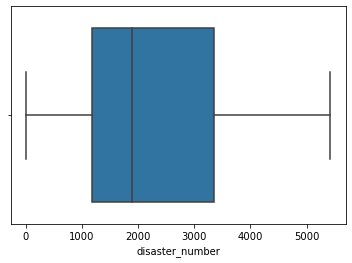

In [29]:
sns.boxplot(Ndis_df['disaster_number'])

<AxesSubplot:xlabel='fips'>

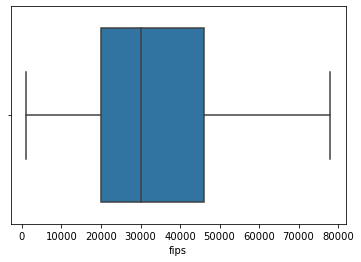

In [30]:
sns.boxplot(Ndis_df['fips'])

<AxesSubplot:xlabel='declaration_request_number'>

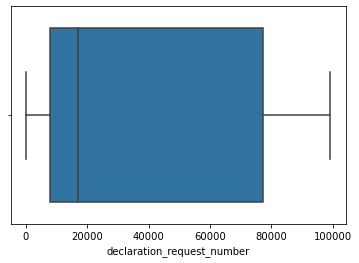

In [31]:
sns.boxplot(Ndis_df['declaration_request_number'])

<AxesSubplot:xlabel='fy_declared'>

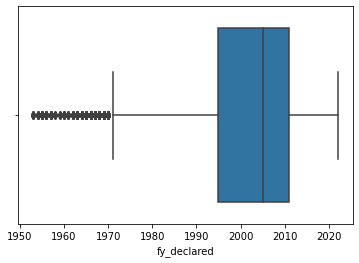

In [32]:
sns.boxplot(Ndis_df['fy_declared'])

In [33]:
Q1=np.percentile(Ndis_df['fy_declared'],25,interpolation="midpoint")
Q3=np.percentile(Ndis_df['fy_declared'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

outlier=[]
for x in Ndis_df['fy_declared']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the fy_declared values")

1971.0
2035.0
1853 outliers found in the fy_declared values


Text(0.5, 1.0, "Boxplot of the 'fy_declared' values after treating the outliers")

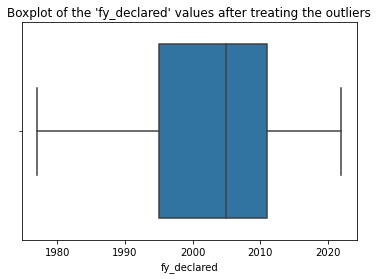

In [34]:
# Computing 10th percentiles and replacing the outliers
tenth_percentile = int(np.percentile(Ndis_df['fy_declared'], 10))

# the values below 10th percentile are replaced with 10th percentile value
Ndis_df['fy_declared'] = np.where(Ndis_df['fy_declared']<tenth_percentile, tenth_percentile, Ndis_df['fy_declared'])

sns.boxplot(Ndis_df['fy_declared'])
plt.title("Boxplot of the 'fy_declared' values after treating the outliers")

<AxesSubplot:xlabel='place_code'>

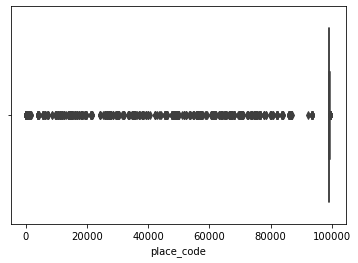

In [35]:
sns.boxplot(Ndis_df['place_code'])

In [36]:
Q1=np.percentile(Ndis_df['place_code'],25,interpolation="midpoint")
Q3=np.percentile(Ndis_df['place_code'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)


98890.0
99266.0


In [37]:
outlier=[]
for x in Ndis_df['place_code']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the fy_declared values")

4016 outliers found in the fy_declared values


Text(0.5, 1.0, "Boxplot of the 'place_code' values after treating the outliers")

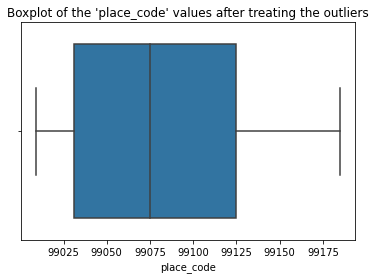

In [38]:
# Computing 10th ,90th percentiles and replacing the outliers
tenth_percentile = int(np.percentile(Ndis_df['place_code'], 10))
ninetieth_percentile = int(np.percentile(Ndis_df['place_code'], 90))

# the values above 90th percentile are replaced with 90th percentile value
Ndis_df['place_code'] = np.where(Ndis_df['place_code']<tenth_percentile, tenth_percentile, Ndis_df['place_code'])
Ndis_df['place_code'] = np.where(Ndis_df['place_code']>ninetieth_percentile, ninetieth_percentile, Ndis_df['place_code'])

sns.boxplot(Ndis_df['place_code'])
plt.title("Boxplot of the 'place_code' values after treating the outliers")

## ENCODING

Ordinal Encoding for state, declaration_type ,incident_type ,declaration_title,

In [45]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

columns_to_be_encoded = [ 'state' ,'incident_type' ,'declaration_title','declaration_type']

for column in columns_to_be_encoded:
    # Create Ordinal encoder
    encoder = OrdinalEncoder()
    get_column = Ndis_df[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    # Ordinally encode reshaped_vals
    Ndis_df[column] = encoder.fit_transform(reshaped_vals)


In [40]:
display(Ndis_df['declaration_title'].nunique())

1941

In [41]:
display(Ndis_df['incident_type'].unique())

array([17.,  7.,  5., 12.,  4., 10., 21., 14., 18., 20.,  3.,  2., 15.,
       13.,  8.,  1.,  6., 11.,  9., 16., 19.,  0.])

In [46]:
display(Ndis_df['declaration_type'].unique())

array([0., 2., 1.])